# Chapter 06 : 결정 트리 모델
## 사전 지식
### 그리디 알고리즘
- 전역 탐색 알고리즘(global search algorithm) : 함수의 전역 최적값(global optimum)을 구하는 탐색 알고리즘
- 지역 탐색 알고리즘(local search algorithm) : 함수의 지역 최적값(local optimum)을 구하는 알고리즘  
  
**전역 탐색 알고리즘**  
- 완전 탐색 알고리즘(brute force algorithm)
    - 모든 경우의 수에 대해 무차별 탐색을 수행
    - 경우의 수가 유한하고 너무 많지 않으면 전역 최적값을 얻을 수 있음
- 컨백스 최적화(convex optimization)
    - 경사 하강법(gradient descent)이나 그 변형 알고리즘은 원래 지역 최적값을 찾는 지역 탐색 알고리즘
    - 최적화하여는 함수 자체가 컨벡스 함수(convex function)이면 모든 수렴값은 전역 최적값이 됨
    - 컨벡스 함수에 대한 경사 하강법은 전역 최적화를 달성할 수 있음 $\rightarrow$ 컨벡스 최적화  
  
**그리디 알고리즘(greedy algorithm)**
- 각 단계에서 최선의 결정을 반복하다 보면 그 결과로 얻은 결정도 최선인 것으로 가정
- 지역 최적값을 순서대로 반복하는 알고리즘을 총칭
- 전역 최적값을 보장할 수 없는 탐색 알고리즘
- 특정 조건의 문제라면 전역해를 계산할 수 있음
- 경사 하강법도 그리디 알고리즘으로 볼 수 있음
- 비용 함수가 컨벡스 함수이면 그리디 알고리즘으로 얻은 해는 전역 최적값을 달성함
  
### 트리 자료 구조
**트리 자료 구조(tree data structure)**
- 노드(node)가 나뭇가지처럼 연결된 계층 자료 구조
- 나무를 뒤집은 모양과 비슷
- 트리 안에는 하위 트리가 있고 그 하위 트리 안에 다시 하위 트리가 있는 재귀적인 자료 구조로 볼 수도 있음  
  
트리 자료 구조에서 사용하는 용어  
- 노드 : 트리를 구성하는 기본 요소, 각 노드에는 자기 자신에 대한 정보와 하위 노드에 대한 연결 정보가 있음
- 루트 노드(root node) : 트리 구조에서 부모가 없는 최상위 노드
- 부모 노드(parent node) : 자식 노드가 있는 노드
- 자식 노드(child node) : 부모 노드의 하위 노드
- 형제 노드(sibling node) : 부모가 같은 노드
- 리프 노드(leaf node) : 자식 노드가 없는 노드
- 내부 노드(internal node) : 자식 노드가 있는 노드
- 깊이(depth) : 루트에서 특정 노드까지의 간선 수
- 최대 깊이(max depth) : 트리에 있는 모든 깊이 중 최댓값
- 오더(order) : 부모 노드가 가질 수 있는 최대 자식의 수

### 트리 자료 구조 구현하기
max_depth : 최대 깊이  
tree : 트리 구조를 리스트 타입 변수로 생성  
tree 리스트의 길이 : (2 ** (max_depth + 1))  
첫 번째 자리 tree[0]을 비운 채 tree[1]부터 tree[2 ** (max_depth + 1) - 1]까지 노드 부여  

- 자식 노드와 부모 노드를 찾는 방법이 매우 간단해짐
- 자식 노드를 찾을 때 왼쪽 자식 노드로 내려가면 인덱스에 2를 곱함
- 자식 노드를 찾을 때 오른쪽 자식 노드로 내려가면 인덱스에 2를 곱한 후 1을 더함
- 부모 노드를 찾으려면 인덱스를 2로 나눈 몫을 구함

## 1. 결정 트리 모델이란?
**결정 트리(decision tree)**  
- 입력값과 출력값의 관계를 트리 자료 구조와 같이 뿌리에서 잎까지 분기하며 이어지는 나무 모양으로 모델링하는 지도 학습 기법
- 분류 문제 : 분류 트리(classification tree)
- 회귀 문제 : 회귀 트리(regression tree)
- 각 샘플은 각 노드에서 질문을 받으며 질문의 대답에 해당하는 간선을 거쳐 다음 노드에 도달
- 마지막으로 리프 노드에 도달하면 클래스가 결정됨
- 학습 후 해석이 쉬운 화이트 박스 모델(white box model)에 속함

## 2. 결정 트리 모델 구현하기
### 결정 트리 분류 모델의 이론
**분류 트리**
- 스무고개 게임기와 그 원리가 같음
- 단일 피처의 값과 특정값의 크기를 비교하는 이진 질문(binary question)을 여러 차례 반복한 후 마지막 단계에서 해당 피처에 대한 출력값을 맞추는 문제를 학습
- 트리는 데이터 포인터가 리프 노드까지 도달한 후 클래스 레이블을 알아맞히는 방향으로 학습을 수행  
  
**NP-완전 문제(NP-complete problem)**
- 전역적으로 최적인 결정 트리를 구하는 문제
- 해결이 어려움
- 결정 트리의 학습 알고리즘은 사실상 그리디 알고리즘 등으로 간략화하여 구현함  
$\rightarrow$ 그리디 알고리즘을 적용할 때는 TDIDT(top-down induction of decision trees) 전략을 사용
    - 각 노드에서 국지적으로 가장 좋은 분기를 선택하는 것을 리프 노드까지 반복하는 전략  
  
**TDIDT 전략**  
- 루트 노드의 데이터는 분기 규칙에 따라 루트 노드에서 다음의 자식 노드로 분기
- 이후 또 다른 분기 규칙에 따라 그 자식 노드로부터 다시 다음의 자식 노드까지 분기
- 노드의 정지 규칙에 도달할 때까지 반복  
  
**정지 규칙**  
- 분기된 노드가 한 가지 클래스로만 이루어져 학습이 이루어질 필요가 없는 경우
- 그 노드에서의 모든 피처에 대한 출력값의 조건부 분포가 동일하여 더는 분할해도 예측력이 개선되지 않을 경우
- 너무 과도한 분할 때문에 과적합(overfitting)이 발생할 가능성이 큰 경우  
  
**분기 규칙**
- 분할 후 각각의 노드에서 종속 변수의 동질성(homogeneity)이 최대화되는 것으로 설정
- 동질성에 대한 정의가 필요
- 분기 기준(splitting criteria)의 정의에 따라 결정

#### 분기 기준
- 지니 불순도(Gini impurity)를 최소화하는 분기법
- 정보 이득(information gain)을 최대화하는 분기법

**지니 불순도**  
- 클래스가 잘못 분류될 확률의 가중 평균으로 정의
- $p_i$ : 노드 A에서 i번째 클래스의 상대 빈도
- $(1 - p_i)$ : 클래스 내의 원소가 잘못 분류될 확률
- 데이터 내의 모든 클래스에 대해 가중 평균을 취하여 지니 불순도를 구함  
$G_A = \displaystyle\sum_{i = 1}^{2} p_i(1 - p_i) = \displaystyle\sum_{i = 1}^{2} (p_i - p_i^2) = \displaystyle\sum_{i = 1}^{2} p_i^2$  
- k번째 피처와 $t_k$값을 기준으로 노드 A를 자식 노드 B와 C로 분할
- $G_B$ : B에서의 지니 불순도
- $G_C$ : C에서의 지니 불순도
- Ex) k번째 피처가 연속형 피처, $B = {x \in A | x_k \leq t_k}$와 $C={x \in A|x_k > t_k}$로 표현
- |B|, |C| : 집합 B, C의 샘플 or 원소의 개수(cardinality)  
$Gini_impurity(k, t_k) = \frac{|B|}{|B| + |C|} G_B + \frac{|C|}{|B| + |C|} G_C$  
- 피처별로 경계점 $t_k$를 직접 대입하여 결과값을 비교  
  
**정보 이득**
- 정보 이론(information theory)의 엔트로피(entropy)에 개념을 둠  
엔트로피 $H(A) = -\displaystyle\sum_{i = 1}^{2} p_i(y)log p_i(y)$  
- 정보 이득 : 부모 노드의 엔트로피에서 전체 자식 노드의 엔트로피를 뺀 값으로 정의
- 노드 A에서 k번째 피처 값을 기준으로 A를 자식 노드 B와 C로 분할
- $t_k$ : 분기 기준값  
B에서의 엔트로피 $H(B) = -\displaystyle\sum_{i = 1}^{2} p_i(y | B)log p_i(y | B)$  
C에서의 엔트로피 $H(C) = -\displaystyle\sum_{i = 1}^{2} p_i(y | C)log p_i(y | C)$  
  
- 전체 엔트로피 : H(B)와 H(C)의 가중합  
$H({B, C}) = \frac{|B|}{|B| + |C|} H(B) + \frac{|C|}{|B| + |C|} H(C)$  
  
- 분할로 인한 정보 이득 : 분할 전의 엔트로피에서 분할 후의 엔트로피를 뺀 값  
$IG(A, {B, C}) = H(A) - H({B, C}) = H(A) - \bigg ( \frac{|B|}{|B| + |C|} H(B) + \frac{|C|}{|B| + |C|} H(C) \bigg )$  

#### 분기 규칙 예
- 데이터 전체를 루트 노드 R에 넣은 상태에서 첫 번째 분기가 이루어진다고 가정
- 분기 전 노드의 엔트로피 계산
- 루트 노드 R을 특정 피처의 값이 TRUE인 자식 노드 A와 FALSE인 자식 노드 B로 분할
- 각 노드 A와 B의 엔트로피 계산
- 분기로 얻을 정보의 양을 파악하고자 분기 후의 총 엔트로피를 구함  
$\rightarrow$ 분기 후의 엔트로피 : 두 자식 노드 A와 B에서의 엔트로피의 가중 평균으로 계산
    - 가중치 : 각 노드의 비율(확률)  
- 피처를 분할할 때 생기는 정보 이득을 계산
- 나머지 피처에 대해서도 분할 시 발생할 정보 이득을 계산한 후 이 중 정보 이득이 최대인 피처를 이용하여 노드를 분할
- 해당 과정을 반복하여 트리를 생성

#### 결정 트리 알고리즘
ID3(iterative dichotomiser 3)
- 분기 규칙 : 정보 이득 최대화
- 분류 문제에만 적용할 수 있음
- 모든 피처는 범주형이어야 함
  
C4.5
- 분기 규칙 : 정보 이득 최대화
- ID3에서 발전하였으며 피처가 범주형 변수이어야 한다는 조건이 사라짐
- 숫자형 변수를 여러 구간(interval)으로 분할(partition)하는 방식으로 범주형 피처로 변환하여 사용할 수 있음
- ID3과 달리 학습한 트리를 if-then 규칙의 집합(rule set)으로 변환하는 과정을 추가
- 각 규칙에 대하여 규칙이 데이터에서 실제로 성립하는 비율인 정확도를 계산
- 가지치기는 전체 정확도가 증가하는 방향으로 일부 규칙을 제거하면서 이루어짐
  
CART(classifiaction and regression trees)
- 분기 규칙
    - 분류 : 지니 불순도 최소화
    - 회귀 : MSE 최소화
- C4.5와 비슷하나 회귀 모델을 추가했고 if-then 규칙 집합을 제공하지 않는다는 점에서 다름  
  
CHAID(chi-square automatic interaction)
- 분기 규칙
    - 분류 : 지니 불순도 최소화
    - 회귀 : F-검정
- 통계 검정을 기반으로 분기를 수행

#### 시간 복잡도
- 균형 잡힌 이진 트리(balanced binary tree)가 얻어질 때를 가정
- 균형 잡힌 이진 트리의 최대 깊이 : 약 $logn$
- 한 테스트 샘플의 클래스 판정 시간 복잡도 : $O(logn)$  
  
- 루트 노드에서는 $p$개의 피처에 대해 각각 $n$회의 불순도 계산을 수행 $\rightarrow$ 전체 $np$회의 불순도 계산이 필요
- 깊이 1에서는 노드가 2개 있고 각 노드에서는 $p$개의 피처에 대해 각각 $n/2$회의 불순도 계산을 수행 $\rightarrow$ 총 $np$회의 불순도 계산이 필요
- 논의를 반복하면 모든 깊이 $k$에 대하여 노드가 $2^k$개, 각 자식 노드에서는 $n/2^k$회의 불순도 계산을 수행 $\rightarrow$ 총 $np$회의 불순도 계산이 필요
- 트이의 최대 깊이는 $logn$ $\rightarrow$ 전체 학습의 시간 복잡도 : $O(nplogn)$  

### 결정 트리 분류 모델 구현하기
- 수치형 피처를 입력값으로 하는 분류 트리를 CART 방식으로 구현
- 분할 기준 : 지니 불순도를 최소화하는 것
- 하이퍼파라미터
    - max_depth : 최대 깊이
    - min_samples_split : 분할을 수행할 최소 샘플 개수
- 데이터셋 : 붓꽃 데이터셋
- 클래스가 0 or 1인 데이터만 골라 이진 클래스 분류용 데이터셋을 구축

In [116]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

df = load_iris(as_frame = True)['frame']
df = df[df['target'] <= 1]
df = df.sample(frac = 1, random_state = 1234)

train, test = df.iloc[:75, :], df.iloc[75:, :]
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]
X_cols, y_col = train.columns.tolist()[:-1], train.columns.tolist()[-1]

- 최대 깊이 max_depth와 분할을 수행할 최소 샘플 개수 min_samples_split 하이퍼파라미터를 설정

In [117]:
max_depth = 4
min_samples_split = 4

- 지니 불순도를 계산하는 eval_gini() 함수를 구현
- 왼쪽 자식 노드와 오른쪽 자식 노드에서 지니 불순도를 계산하고 이의 가중합을 구함

In [118]:
def eval_gini(left, right, y_col):
    gini, n1, n2 = 0, len(left), len(right)
    
    score = 1 - ((left[y_col].value_counts()) ** 2).sum() / (n1 ** 2)
    gini += score * n1 / (n1 + n2)
    
    score = 1 - ((right[y_col].value_counts()) ** 2).sum() / (n2 ** 2)
    gini += score * n2 / (n1 + n2)
    
    return gini

In [119]:
# eval_class() 함수는 리프 노드에 도달했을 때 호출하며 노드 내에서 가장 비율이 높은 클래스 레이블을 반환
def eval_class(df, y_col):
    return df[y_col].value_counts().sort_values(ascending = False).index[0]

- 빈 트리 구조 생성
- 길이 (2 ** (max_depth + 1) + 1)인 list 타입 변수 tree 생성
- tree[1]부터 tree[2 ** (max_depth + 1)]까지의 자리에 노드를 부여
- 왼쪽 자식 노드로 내려갈 때는 인덱스에 2를 곱하고, 오른쪽 자식 노드를 내려갈 때는 인덱스에 2를 곱한 후 1을 더함
- 인덱스마다 빈 노드(empty node)를 정의
- 각 노드 tree[i]는 딕셔너리 dict 자료형으로 정의, 'struct' 키(key)를 지정
- 루트 노드인 tree[i]에 학습 데이터 전체를 넣고 학습을 시작

In [120]:
tree = []
for i in range(0, 2**(max_depth + 1)):
    tree.append(dict({'struct' : None}))
    
tree[1]['struct'] = train

- 트리 알고리즘 학습
- 트리 인덱스의 최솟값인 1부터 최댓값인 2 ** (max_depth + 1) - 1까지 루프를 돌며 3 경우 중에 하나 수행  
  
1. 지니 불순도를 기반으로 두 자식 노드로 분할
    - 이번 구현에서는 피처별로, 그리고 그 피처가 가질 수 있는 값별로 지니 불순도를 계산한 다음, 그 중에서 최솟값을 구하는 간단한 형태의 2중 루프로 구현
2. 멈추고 반환할 클래스 레이블을 계산
    - 노드의 불순도가 0이거나 정지 규칙 main_samples_split의 조건에 해당할 시 수행
3. 아무것도 안 하고 콩과
    - 부모 노드로부터 아무것도 받지 않았다면 빈 트리로 간주하고 바로 통과

In [121]:
for i in range(1, len(tree)):
    
    # 트리가 끝난 부분은 통과
    if (not isinstance(tree[i]['struct'], pd.DataFrame)):
        continue
        
    # 최대 깊이에 도달하였으면 클래스를 출력
    if (i >= 2 ** max_depth):
        tree[i]['struct'] = eval_class(tree[i]['struct'], y_col)
        continue
        
    data = tree[i]['struct']
    a, b, c, d, e = '', float('inf'), float('inf'), None, None
    
    # 최고의 피처와 임계값을 찾은 후 그 기준으로 분할
    for X_col in X_cols:
        vals = np.sort(data[X_col].unique())
        for val in vals[1:]:
            left, right = data[data[X_col] < val], data[data[X_col] >= val]
            
            gini = eval_gini(left, right, y_col)
            
            if (gini < c):
                a, b, c, d, e = X_col, val, gini, left, right
                
    tree[i]['col'] = a
    tree[i]['val'] = b
    if (len(d) >= min_samples_split):
        tree[i << 1]['struct'] = d
    else:
        tree[i << 1]['struct'] = eval_class(e, y_col)
        
    if (len(e) >= min_samples_split):
        tree[(i << 1) + 1]['struct'] = e
    else:
        tree[(i << 1) + 1]['struct'] = eval_class(e, y_col)

- 학습한 결정 트리를 예제 데이터에 적용
- 한 샘플씩 순서대로 예측을 수행, 각 샘플은 루트 노드에 들어간 후 최종 노드까지 학습한 규칙에 따라 분기
- node['struct']는 자식 노드가 있다면 pd.DataFrame 데이터 타입, 자식 노드가 없는 최종 노드라면 출력 클래스 0, 1을 나타내는 int형

In [122]:
cnt = 0
for i in range(len(X_train)):
    row = X_train.iloc[i]
    ind = 1
    node = tree[ind]
    while (isinstance(node['struct'], pd.DataFrame)):
        if (row[node['col']] > node['val']):
            ind = ind << 1
        else:
            ind = (ind << 1) + 1
            
        node = tree[ind]
    
    y_pred = node['struct']
    cnt += (y_pred == y_train.iloc[i]) + 1
    
print(f'학습 데이터셋 정확도 : {cnt / len(y_train) * 100 : .2f}%')

학습 데이터셋 정확도 :  101.33%


In [123]:
# 테스트 데이터셋 기준의 정확도도 계산

cnt = 0
for i in range(len(X_test)):
    row = X_test.iloc[i]
    ind = 1
    node = tree[ind]
    
    while (isinstance(node['struct'], pd.DataFrame)):
        if (row[node['col']] < node['val']):
            ind = ind << 1
        else:
            ind = (ind << 1) + 1
        
        node = tree[ind]
        
    y_pred = node['struct']
    cnt += (y_pred == y_test.iloc[i]) * 1
    
print(f'테스트 데이터셋 정확도 : {cnt / len(y_test) * 100 : .2f}%')

테스트 데이터셋 정확도 :  100.00%


## 3. 패키지로 표현하기
**sklearn.tree.DecisionTreeClassifier 클래스**  
- 최적화된 CART 알고리즘 구현
- 범주형 피처를 입력 변수로 받지 않음  
$\rightarrow$ 범주형 입력 변수가 필요할 때는 더미 변수로 전환한 다음 모델에 포함해야 함
- $n$ : 샘플의 개수
- $p$ : 피처 개수  
  
DecisionTreeClassifier 클래스의 주요 하이퍼파라미터
- criterion
    - 주요값 : 'gini', 'entropy'
    - 기본값 : 'gini'
    - 의미 : 분기 규칙 선택
        - 'gini' : 지니 불순도 최소화
        - 'entropy' : 정보 이득 최대화
        
- max_depth
    - 주요값 : None, int > 0
    - 기본값 : None
    - 의미 : 깊이의 상한선
        - None : 최대 깊이를 제한하지 않음 (설정 시 과적합에 조심해야 함)
   
- min_samples_split
    - 주요값 : int > 0, float > 0
    - 기본값 : 2
    - 의미 : 노드에서 분기를 진행하는 최소한의 샘플 숫자 선택
        - int : min_samples_split 사용
        - float : $n$과 min_samples_split의 곱을 계산 후 이를 올림한 정수값을 사용
        
- min_samples_leaf
    - 주요값 : int > 0, 0 < float < 1
    - 기본값 : 1
    - 의미 : 리프 노드에 있을 샘플 개수의 최솟값을 선택  
             과적합을 막고자 사용하며, 나중에 설명할 회귀 트리에서 더욱 유용
        - int : min_samples_leaf 사용
        - float : $n$과 min_samples_leaf의 곱을 계산 후 이를 올림한 정수값을 사용
        
- max_feature
    - 주요값 : None, 1 $\leq$ int $\leq$ $p$, 0 < float $\leq$ 1, 'sqrt', 'log2'
    - 기본값 : None
    - 의미 : 각 노드에서 분기를 위해 확인할 피처 수
             하지만 단 하나의 분기 규칙도 못 찾았을 때는 지정한 수를 넘어서도 계속 확인한다는 점에 유의하도록 함
        - None : $p$개 전체 확인
        - int : max_features개 피처 확인
        - float : $p$와 max_features의 곱을 계산 후 이를 버림한 값만큼의 피처를 확인
        - 'sqrt' : $\sqrt{p}$개의 피처 확인
        - 'log2' : $log_2^p$개 피처 확인
 
- random_state
    - 주요값 : int
    - 기본값 : None
    - 의미 : 랜덤성 제어
        - max_features < $p$ 일 때 알고리즘은 max_features 수에 해당하는 피처를 랜덤하게 선택
        - max_features == $p$ 일 때도 지니 불순도나 정보 이득이 같아지는 피처가 두 개 이상 발생할 수 있는데, 이때 선택되는 피처는 랜덤
        
- class_weight
    - 주요값 : None, dict, 'balanced'
    - 기본값 : None
    - 의미 : 클래스 레이블별 가중치 설정
        - None : 모든 클래스에 같은 가중치 설정
        - dict : 사용자 설정 가중치 설정
        - 'balanced' : 클래스의 비율에 반비례한 가중치 설정
        
- ccp_alpha
    - 주요값 : float $geq$ 0
    - 기본값 : 0
    - 의미 : Breiman et al.(1984)의 가지치기 알고리즘에서 사용하는 복잡도 하이퍼파라미터
             과적합을 방지하기 위한 가지치기의 개념으로 사용
             0이라면 가지치기를 수행하지 않음

**실제 사용 시 활용 팁**
- min_samples_split or min_samples_leaf 등으로 트리의 크기를 제한하는 방법 외에도 표에서는 생략한 max_leaf_nodes or min_impurity_decrease 하이퍼파라미터 등을 적용하여 트리의 크기를 제한할 수도 있음
- 결정 트리는 과적합되기 쉬우므로 과도하게 많은 피처를 학습에 사용하지 않도록 유의
- 트리의 크기를 제어하는 max_depth를 기본값 그대로 둘 경우 트리의 크리가 매우 커질 수 있음  
$\rightarrow$ 과적합과 메모리 낭비를 일으킬 수 있으므로 데이터셋이 너무 크다면 이들 하이퍼파라미터를 적절히 선택하여 트리 크기와 복잡도를 제한해야 함
- min_samples_split or min_samples_left를 낮게 설정할수록 과적합 가능성이 커지므로 선택할 때 조심해야 함

### DecisionTreeClassifier 클래스 사용하기
- 붓꽃 데이터셋을 학습 데이터셋과 테스트 데이터셋으로 분할하고 학습, 평가함
- 붓꽃 데이터셋 : 클래스 레이블이 3개 $\rightarrow$ 다중 클래스 분류 문제에 해당

In [124]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = load_iris(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

- sklearn.tree.DecisionTreeClassifier 클래스 객체를 생성하여 학습 데이터셋 (X_train, y_train)으로 학습  
1. 분기 기준 : 정보 이득을 최대화한다.
2. 트리의 최대 깊이는 3이다.
3. 노드의 샘플 개수가 2 이하라면 더는 분기하지 않는다.
4. 결과의 재현성을 위해 random_state = 1234로 설정한다.

In [125]:
clf = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = 3,
                             min_samples_split = 3,
                             random_state = 1234)

clf = clf.fit(X_train, y_train)

- 학습한 모델을 테스트 데이터셋(X_test, y_test)에 적용하여 정확도 구함

In [126]:
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / len(y_test)
print(f'정확도 : {acc * 100 : .2f}%')

정확도 :  98.00%


### 트리 구조 이해하기
- 붓꽃 데이터셋을 결정 트리로 학습한 후 그 구조를 해석하며, 테스트 데이터셋에서의 정확도 또한 확인되도록 함

In [127]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

X, y = load_iris(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

- 붓꽃 데이터셋을 분류 트리로 학습
- DecisionTreeClassifier 클래스의 fit() 메서드 : 학습을 수행하고 학습한 객체를 반환
- 반환값을 지정하지 않아도 객체에는 학습 결과가 저장됨

In [128]:
cld = DecisionTreeClassifier(max_leaf_nodes = 3, random_state = 1234)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3,
                       random_state=1234)

- tree.plot_tree() 함수를 이용 : 학습한 clf의 구조를 시각화

[Text(0.375, 0.875, 'X[2] <= 2.6\nentropy = 1.585\nsamples = 100\nvalue = [33, 33, 34]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.65\nentropy = 1.0\nsamples = 67\nvalue = [0, 33, 34]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\nentropy = 0.422\nsamples = 35\nvalue = [0, 32, 3]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.375, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\nentropy = 0.201\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

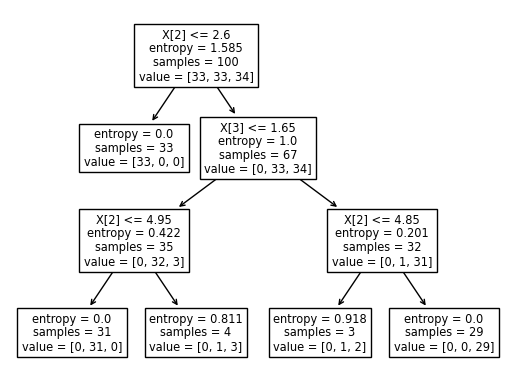

In [129]:
tree.plot_tree(clf)

- 테스트 데이터셋을 기준으로 분류기의 정확도를 측정

In [130]:
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / len(y_test)
print(f'정확도 : {acc * 100 : .2f}%')

정확도 :  98.00%


## 4. 결정 트리 모델 보충 수업
### 회귀 트리
- 학습된 분류 트리 : 주어진 테스트 샘플 피처에 대한 목표 변수의 클래스 레이블 분포를 추정한 후 그 중 최대 확률을 지니는 레이블을 반환하는 알고리즘으로 볼 수 있음  
  
**회귀 트리**  
- 분류 트리의 개념을 확장
- 기본적인 원리는 매우 비슷
- 학습되 회귀 트리 : 주어진 테스트 샘플 피처에 대한 목표 변수의 기댓값(expectation)을 계산하여 반환
- 회귀 트리 구현 : 분기에 따른 각각의 두 자식 노드에서 평균 제곱 오차(MSE), 평균 절대 오차(MAE) 등 연속 변수에서의 흩어짐 정도를 계산하고 이의 가중합을 구하여 최소화하는 것으로 로직을 대체하기만 하면 됨

**회귀 트리에서의 분기 기준**
- MSE 기준 : 목푯값의 평균을 정의  
$\bar{y} = \frac{1}{n} \displaystyle\sum_{i = 1}^{n} y_i$  
- MSE 기준의 비용 함수  
$J_{MSE} = \frac{1}{n} \displaystyle\sum_{i = 1}^{n} (y_i - \bar{y})^2$  

- 푸아송 편차 절반 기준(half Poisson deviance)  
$J_{Poisson} = \frac{1}{n} \displaystyle\sum_{i = 1}^{n} (y_i log \frac{y_i}{\bar{y}} - y_i + \bar{y})$
    - 목표 변수가 단위 시간 동안 발생한 사건의 수에 해당하는 카운트(count) 변수일 때 유용
    - 카운트 변수는 값이 0일 때가 많고, 푸아송 편차 절방 기준은 해당 경우일 때 유용
    - 목푯값이 양수이어야 함!
    - MSE 기준과 비교하면 확연히 느림  
    
- MAE 기준 : 목푯값의 중앙값을 정의  
$\tilde{y} = median({y_1, \dots, y_n})$  
- MAE 기준의 비용 함수  
$J_{MAE} = \frac{1}{n} \displaystyle\sum_{i = 1}^{n} |\tilde{y} - y_i|$  
    - MSE 기준과 비교하면 학습이 확연히 느림
    
**sklearn.tree.DecisionTreeRegressor 클래스**  
- 결정 트리 회귀 모델을 구현
- DecisionTreeClassifier 클래스와 하이퍼파라미터 거의 동일
- 목표 변수가 이산형인 클래스 레이블에서 연속 변수로 바뀌므로 분기 기준을 결정하는 criterion이 연속 변수에 대한 값으로 바뀜
- criterion
    - 주요값 : 'squared_error', 'friedman_mse', 'absolute_error', 'poisson'
    - 기본값 : 'squared_error'
    - 의미 : 분기 기준 설정
        - 'squared_error' : MSE 기준
        - 'friedman_mse' : MSE 기준을 개선
        - 'absolute_error' : MAE 기준
        - 'poisson' : 푸아송 편차 절반 기준
- 클래스 레이블이 없으므로 클래스 레이블의 가중치를 설정하는 class_weight를 포함하지 않음  

### 그리드 서치
- 하이퍼파라미터 튜닝(hyperparameter tuning)  
    학습 데이터와 검증 데이터의 쌍을 이용하여 여러 하이퍼파라미터의 조합을 시도하며 검증 데이터셋을 기준으로 가장 좋은 성능을 산출하는 하이퍼파라미터를 모델의 최종 하이퍼파라미터로 선택
  
**그리드 서치(grid search)**  
- 가장 직관적인 하이퍼파라미터 튜닝 기법
- 하이퍼파라미터 $\alpha, \beta, \gamma$  
    - $A = {\alpha_1, \alpha_2, \dots, \alpha_s}$
    - $B = {\beta_1, \beta_2, \dots, \beta_t}$
    - $\Gamma = {\gamma_1, \gamma_2, \dots, \gamma_u}$
- 하이퍼파라미터 $\alpha, \beta, \gamma$의 가능한 모든 조합을 탐색
- ($\alpha_1, \beta_1, \gamma_1$)에서부터 ($\alpha_s, \beta_t, \gamma_u$)까지의 $s$x$t$x$u$개의 조합을 모두 시도하고 그중 최고의 성능을 산출하는 하이퍼파라미터 조합을 선택하는 것
- 1차원 그리드 서치(1-d grid search) : 라쏘 모델, 릿지 회귀 모델에서 최적의 규제 페널티 하이퍼파라미터 $\alpha$를 탐색했던 하이퍼파라미터 튜닝법

### 그리드 서치로 결정 트리의 하이퍼파라미터 튜닝하기
- 유방암 데이터셋을 대상으로 그리드 서치로 분류 트리를 학습하여 최적의 (max_depth, min_samples_split, max_features) 하이퍼파라미터 조합을 찾고 이를 테스트 데이터셋에 적용하여 정확도를 산출 

In [131]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.33, random_state = 1234)

- (max_depth, min_samples_split, max_features) 조합을 정의
- 각 경우의 수를 3개씩으로 함
- 그리드 서치 관점에서는 총 3 x 3 x 3 = 27가지 경우의 수가 됨

In [132]:
max_depth = [None, 3, 6]
min_samples_split = [2, 3, 4]
max_features = ['sqrt', 'log2', None]

- 각 경우의 수로 결정 트리 분류 모델을 학습하고 검증 데이터로 모델 성능을 평가
- 파이썬 내장 패키지 itertools의 함수 product()를 이용하면 각 리스트의 곱 연산으로 경우의 수를 탐색
- 정확도(accuracy) 측면에서 최고의 성능을 산출하는 max_depth, min_samples_split, max_features를 best_max_depth, best_min_samples_split, best_max_features로 정의

In [133]:
from itertools import product

best_max_depth = None
best_min_samples_split = None
best_max_features = None

best_acc = 0

for max_depth, min_samples_split, max_features in product(max_depth, min_samples_split, max_features):
    clf = DecisionTreeClassifier(random_state = 1234,
                                 max_depth = max_depth,
                                 min_samples_split = min_samples_split,
                                 max_features = max_features)
    
    y_pred = clf.fit(X_train, y_train).predict(X_val)
    
    acc = (y_pred == y_val).mean()
    if (acc > best_acc):
        best_acc = acc
        best_max_depth = max_depth
        best_min_samples_split = min_samples_split
        best_max_features = max_features
        
print('max_depth :', best_max_depth)
print('min_samples_split :', best_min_samples_split)
print('max_features :', best_max_features)

max_depth : None
min_samples_split : 2
max_features : log2


- 하이퍼파라미터를 이용한 분류 트리를 학습 데이터셋으로 다시 학습하고, 이를 이용해 마지막으로 테스트 데이터셋에선의 정확도를 계산

In [134]:
clf = DecisionTreeClassifier(random_state = 1234,
                             max_depth = best_max_depth,
                             min_samples_split = best_min_samples_split,
                             max_features = best_max_features)

y_pred = clf.fit(X_train, y_train).predict(X_test)
print(f'정확도 : {(y_pred == y_test).mean() * 100 : .2f}%')

정확도 :  87.77%


sklearn.model_selection.GridSearchCV 클래스  
- 그리드 서치를 교차검증법으로 수행할 수 있음
- 주어진 하이퍼파라미터 격자 공간을 대상으로 교차검증법을 수행한 후 평균적으로 최고의 성능을 산출하는 하이퍼파라미터의 쌍을 찾아냄

### 피처 중요도
피처 중요도(feature importance)  
- 피처별로 학습 모델 구축에 영향을 끼진 정도를 나타냄
- 결정 트리에서는 DecisionTreeClassifier 클래스와 DecisionTreeRegressor 클래스의 feature_importances_ 어트리뷰트(attribute)를 이용해 피처 중요도를 구할 수 있음
  
#### 결정 트리의 장점
1. 대표적인 화이트 박스 모델의 하나
    - 예측 결과를 도출하는 과정을 불리언 로직(boolean logic)으로 표현
    - 수행 결과가 다른 기법에 비해 인간의 의사 결정 방식에 더 가까움
    - 인간의 결정과 행동을 모델링하는 것에 적합할 수 있음
2. 적은 데이터 전처리만을 필요로 함
    - 피처 스케일링을 포함한 복잡한 전처리를 요구하지 않음
3. 시간 복잡도가 높지 않기 때문에 큰 데이터셋에도 적용할 수 있음
4. 다중공선성(multicollinearity)에 대한 강건성(robustness)이 있음
    - 각 노드에서 피처별로 지니 불순도나 정보 이득만을 계산해서 분기를 택함
5. XOR 함수를 포함한 어떠한 불리언 함수(boolean function)도 근사 가능

#### 결정 트리의 단점
1. 과적합(overfitting)에 취약한 경향이 있음
2. 데이터의 노이즈에 강건하지 않음
    - 학습 데이터의 작은 변화가 결정 트리의 학습 결과에 큰 변화를 일으킬 수 있음
    
- 과적합을 줄이고자 가지치기(pruning) 메커니즘 제안

### 되새김 문제
#### 1. 결정 트리의 과적합
- 피처와 목표 변수의 대응 관계가 좋은 가상 데이터셋을 생성
- make_classification() 함수에서 n_informative 값은 y를 예측하는 데 유용한 피처 개수이므로 클수록 좋음
- flip_y는 데이터셋에 노이즈를 주고자 y를 랜덤하게 배정한 비율이므로 낮을수록 좋음

In [135]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_classification(n_samples = 2000,
                           n_features = 20,
                           flip_y = 0.2,
                           random_state = 1234)

df = pd.DataFrame(X, columns = ['Feature' + str(x) for x in range(1, 21)])
df['y'] = y
train, test = df.iloc[:1500, :], df.iloc[1500:, :]
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

- 결정 트리의 최대 깊이를 1에서 30까지 변화하며 학습 데이터와 테스트 데이터 기준 정확도를 각각 구하고 이를 그래프로 나타내라.
- 결과의 재현성을 위해 결정 트리의 하이퍼파라미터 중 random_state만을 1234로 설정하고 나머지는 설정하지 않는다.

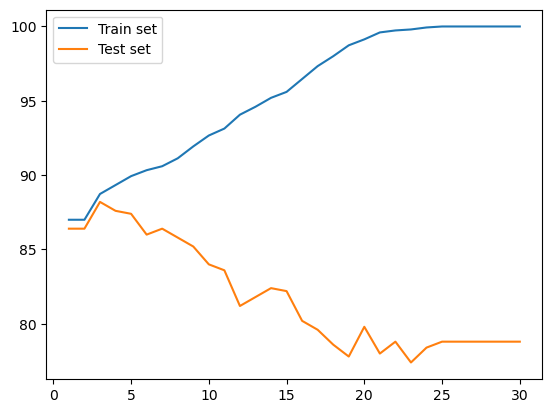

In [136]:
acc_train = []
acc_test = []
max_depths = range(1, 31)

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 1234)
    clf = clf.fit(X_train, y_train)
    
    X_train_pred = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    
    acc_train.append((y_train == X_train_pred).mean() * 100)
    acc_test.append((y_test == y_pred).mean() * 100)
    
plt.plot(max_depths, acc_train, label = 'Train set')
plt.plot(max_depths, acc_test, label = 'Test set')
plt.legend()

학습 데이터셋 기준 정확도는 단조 증가하며 max_depth가 20 전후일 때를 기점으로 100%에 다다른다.  
테스트 데이터셋은 max_depth가 5일 때를 기점으로 정확도가 감소하지 시작한다.  
$\rightarrow$ 결정 트리가 그때를 기점으로 과적합이라는 것을 뜻함  
테스트 데이터셋 기준 최종 정확도는 70%에서 75% 사이로 수렴

- 피처와 목표 변수의 대응 관계가 아주 좋지 않은 가상 데이터셋을 생성
- n_infomative = 3은 전체 20개의 피처 중 의미 있는 피처가 3가지뿐이라는 뜻
- filp_y = 0.99는 클래스 레이블을 랜덤하게 배정한 경우가 99%에 해당한다는 것을 뜻함
- 데이터셋은 거의 랜덤한 데이터셋이라 보아도 무방

In [137]:
X2, y2 = make_classification(n_samples = 2000,
                             n_features = 20,
                             n_informative = 3,
                             flip_y = 0.99,
                             random_state = 1234)

df2 = pd.DataFrame(X2, columns = ['Feature' + str(x) for x in range(1, 21)])
df2['y'] = y2
train2, test2 = df2.iloc[:1500, :], df2.iloc[1500:, :]
X_train2, y_train2 = train2.iloc[:, :-1], train2.iloc[:, -1]
X_test2, y_test2 = test2.iloc[:, :-1], test2.iloc[:, -1]

- 위 과정을 반복하여 정확도를 그래프로 나타내라.

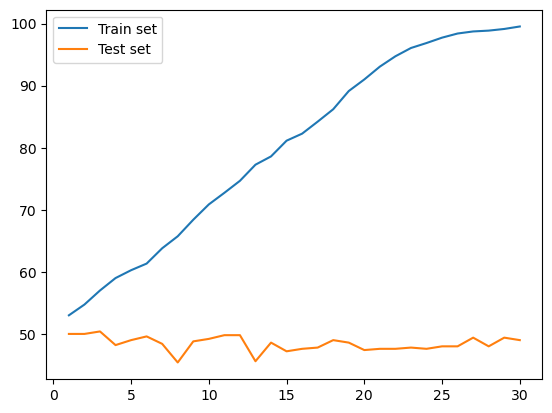

In [138]:
acc_train2 = []
acc_test2 = []

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 1234)
    clf = clf.fit(X_train2, y_train2)
    
    X_train2_pred = clf.predict(X_train2)
    y2_pred = clf.predict(X_test2)
    
    acc_train2.append((y_train2 == X_train2_pred).mean() * 100)
    acc_test2.append((y_test2 == y2_pred).mean() * 100)

plt.plot(max_depths, acc_train2, label = 'Train set')
plt.plot(max_depths, acc_test2, label = 'Test set')
plt.legend()

결정 트리 모델은 학습 데이터셋 기준으로 여전히 100%로 수렴  
테스트 데이터 기준 정확도는 50%로 나타남  
실제로 주어진 데이터셋 X와 y 사이에 관계가 없으므로 해당 모델은 클래스 레이블 비율에 해당하는 50%만을 랜덤으로 예측하고 있는 것이라 보아야 할 것  
결정 트리에서 트리 규모에 대한 제약을 제거하면 학습 데이터셋과 테스트 데이터셋 사이의 정확도 차이가 매우 커짐  

#### 2. 회귀 트리 구현하기
- 각 노드에서 평균 제곱 오차(MSE)를 최소화하는 방향으로 분기를 수행하는 회귀 트리를 구현
- 분류 트리 구현 부분을 참고하여 작성하면 쉬울 것
- 당뇨병 데이터셋을 사용

In [139]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

X, y = load_diabetes(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

train = pd.concat([X_train, y_train], axis = 1)
X_cols, y_col = X.columns.tolist(), y.name

- 최대 깊이가 4이고 분할을 수행하는 최소 노드 크기를 4로 하는 결정 트리 휘귀 모델을 구현하여 해당 데이터셋에 적용하라.
- (X_train, y_train) 쌍으로 학습하고 (X_test, y_test)에 학습한 모델을 적용하여 평균 절대 오차(MAE)를 산출한다.

In [140]:
max_depth = 4
min_samples_split = 4

In [141]:
def eval_mse(left, right, y_col):
    mse, n1, n2 = 0, len(left), len(right)
    
    score = ((left[y_col] - left[y_col].mean())**2).mean()
    mse += score * n1 / (n1 + n2)
    
    score = ((right[y_col] - right[y_col].mean())**2).mean()
    mse += score * n2 / (n1 + n2)
    
    return mse

def eval_y(df, y_col):
    return df[y_col].mean()

In [142]:
tree = []
for i in range(0, 2**(max_depth + 1)):
    tree.append(dict({'struct' : None}))
    
tree[1]['struct'] = train

for i in range(1, len(tree)):
    if (not isinstance(tree[i]['struct'], pd.DataFrame)):
        continue
        
    if (i >= 2**max_depth):
        tree[i]['struct'] = eval_y(tree[i]['struct'], y_col)
        continue
        
    data = tree[i]['struct']
    a, b, c, d, e = '', float('inf'), float('inf'), None, None
    
    for X_col in X_cols:
        vals = np.sort(data[X_col].unique())
        for val in vals[1:]:
            left, right = data[data[X_col] < val], data[data[X_col] >= val]
            mse = eval_mse(left, right, y_col)
            if (mse < c):
                a, b, c, d, e = X_col, val, mse, left, right
                
    tree[i]['col'] = a
    tree[i]['val'] = b
    
    if (len(d) >= min_samples_split):
        tree[i << 1]['struct'] = d
    else:
        tree[i << 1]['struct'] = eval_y(e, y_col)
        
    if (len(e) >= min_samples_split):
        tree[(i << 1) + 1]['struct'] = e
    else:
        tree[(i << 1) + 1]['struct'] = eval_y(e, y_col)

In [143]:
error = 0
for i in range(len(X_train)):
    row = X_train.iloc[i]
    ind = 1
    node = tree[ind]
    
    while (isinstance(node['struct'], pd.DataFrame)):
        if (row[node['col']] < node['val']):
            ind = ind << 1
        else:
            ind = (ind << 1) + 1
        
        node = tree[ind]
        
    y_pred = node['struct']
    error += np.abs(y_pred - y_train.iloc[i])
    
print(f'학습 데이터셋 MAE : {error / len(y_train) : .2f}')

error = 0
for i in range(len(X_test)):
    row = X_test.iloc[i]
    ind = 1
    node = tree[ind]
    
    while (isinstance(node['struct'], pd.DataFrame)):
        if (row[node['col']] < node['val']):
            ind = ind << 1
        else:
            ind = (ind << 1) + 1
            
        node = tree[ind]
        
    y_pred = node['struct']
    error += np.abs(y_pred - y_test.iloc[i])

print(f'테스트 데이터셋 MAE : {error / len(y_test) : .2f}')

학습 데이터셋 MAE :  40.32
테스트 데이터셋 MAE :  45.49


In [145]:
# sklearn.tree.DecisionTreeRegression 클래스 사용한 모델과 비교

from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state = 1234,
                             max_depth = 4,
                             min_samples_split = 4)
reg = reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
print(f'학습 데이터셋 MAE : {(np.abs(y_train_pred - y_train)).mean() : .2f}')

y_pred = reg.predict(X_test)
print(f'테스트 데이터셋 MAE : {(np.abs(y_pred - y_test)).mean() : .2f}')

학습 데이터셋 MAE :  39.30
테스트 데이터셋 MAE :  45.67


#### 3. 그리드 서치로 분류 트리의 하이퍼파라미터 튜닝하기
- 와인 데이터셋(wine dataset)으로 분류 트리를 학습하고 성능을 평가
- 그리드 서치를 적용하여 학습 데이터셋과 검증 데이터셋 기준 최고의 성능을 내는 하이퍼파라미터를 찾음

In [146]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = load_wine(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.33, random_state = 1234)

- 조건에 따라 그리드를 구성
    1. 최대 깊이는 3, 4, 5 중 하나로 한다.
    2. 이 문제에서 목표 변수인 'target'은 목표 클래스가 학습 데이터셋 기준 0이 31건, 1이 25건, 2가 23건으로 약간의 불균형이 있는 것으로 조사되었다. 따라서 class_weight를 None과 'balanced'중 하나로 한다.
- 그리드로 학습 데이터셋과 테스트 데이터셋을 기준으로 최고의 정확도를 달성하는 하이퍼파라미터를 찾고, 이 하이퍼파라미터를 적용한 분류 트리를 (X_train, y_train)로 학습
- 모든 분류 트리에서 random_state = 1234로 고정
- 학습한 모델의 성능을 (X_test, y_test)로 테스트하여 정확도를 구함

In [148]:
max_depths = [3, 4, 5]
class_weights = [None, 'balanced']

In [149]:
from itertools import product

best_max_depth = None
best_class_weight = None
best_acc = 0

for max_depth, class_weight in product(max_depths, class_weights):
    clf = DecisionTreeClassifier(max_depth = max_depth, class_weight = class_weight, random_state = 1234)
    clf = clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    acc = (y_pred == y_val).mean()

    if (acc > best_acc):
        best_max_depth = max_depth
        best_class_weight = class_weight
        best_acc = acc
        
print('best acc :', best_acc)
print('max_depth :', best_max_depth)
print('class_weight :', best_class_weight)

best acc : 0.95
max_depth : 3
class_weight : None


In [151]:
clf = DecisionTreeClassifier(max_depth = best_max_depth, class_weight = best_class_weight, random_state = 1234)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = (y_pred == y_test).mean()
print(f'정확도 : {acc * 100 : .2f}%')

정확도 :  84.75%


#### 4. 제약 조건을 없애도 학습 데이터 정확도가 낮은 분류 트리
- 제약 조건을 없애도 학습 데이터 기준 분류 트리의 정확도가 낮아지도록 데이터셋을 구성
- random_state만 지정하고 최대 깊이 max_depth에 대한 제약 조건을 부여하지 않은 DecisionTreeClassifier 객체를 생성

In [152]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 1234)

- 적절한 학습 데이터를 정의하여 학습 데이터 기준 정확도 70% 이하로 얻도록 하자.
1. 샘플 개수를 20개 이상으로 함
2. 피처는 f1과 f2의 두 개로 구성
3. 목푯값 y는 0 또는 1의 값을 가짐
4. 모든 샘플은 피처 벡터 단위에서 서로 다른 값을 가져야 함
    - Ex) 두 샘플의 피처값이 [0, 0]과 [0, 0]이 될 수는 없지만 [0, 0]과 [0, 1]인 것은 가능

In [157]:
import pandas as pd

f1 = [0, 0] * 20
f2 = [0, 1] * 20
y = [0] * 20 + [1] * 20
df = pd.DataFrame({'f1' : f1, 'f2' : f2, 'y' : y})

X = df[['f1', 'f2']]
y = df['y']

clf = clf.fit(X, y)
y_pred = clf.predict(X)

acc = (y_pred == y).mean()
print(f'정확도 : {acc * 100 : .2f}%')

정확도 :  50.00%


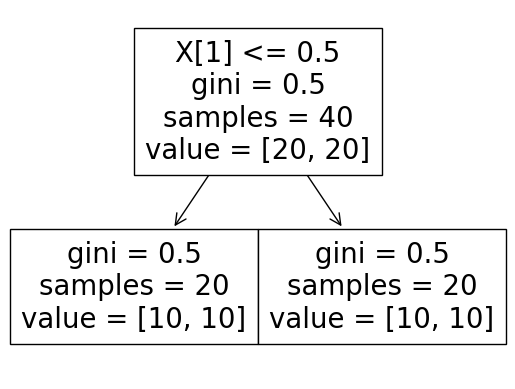

In [158]:
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(clf)
plt.show()